<a href="https://colab.research.google.com/github/mostynw/e-commerce_classifier/blob/main/e_commerce_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Develop machine learning models to **predict e-commerce visitors’ 
purchasing intention.**

The given dataset **data.csv**, contains shoppers’ online activity information including clickstream 
and session information data, where the last column Revenue represents visitors’ 
purchasing intention. 

Tasks include **data exploration**, **data pre-processing**, **machine learning method selection and implementation**, and **model performance evaluation**. 


**Data Exploration [10%]**

Conduct exploratory inspection of the dataset to provide a good understanding of data characteristics.

In [ ]:
import pandas as pd

#read in the data
data = pd.read_csv('/content/drive/MyDrive/Coursework_1_data.csv')

#check the formatting and headers etc.
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
#see info on every feature 
data.info()

#NOTE: Dtypes are numeric for all except the last three features and month, they will need to be changed to numeric. 
#NOTE: Non-Null count is 12330 for every feature, indicating a complete dataset. Further check below. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
#check explicitly for NA's in the data 
data.isna().sum()

#NOTE: No NA's in the data

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
#use describe() to get a feel for the range of values for each feature as well as mean and std
data.describe()

#NOTE: Features involving time duration have large ranges, this will need to be scaled

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


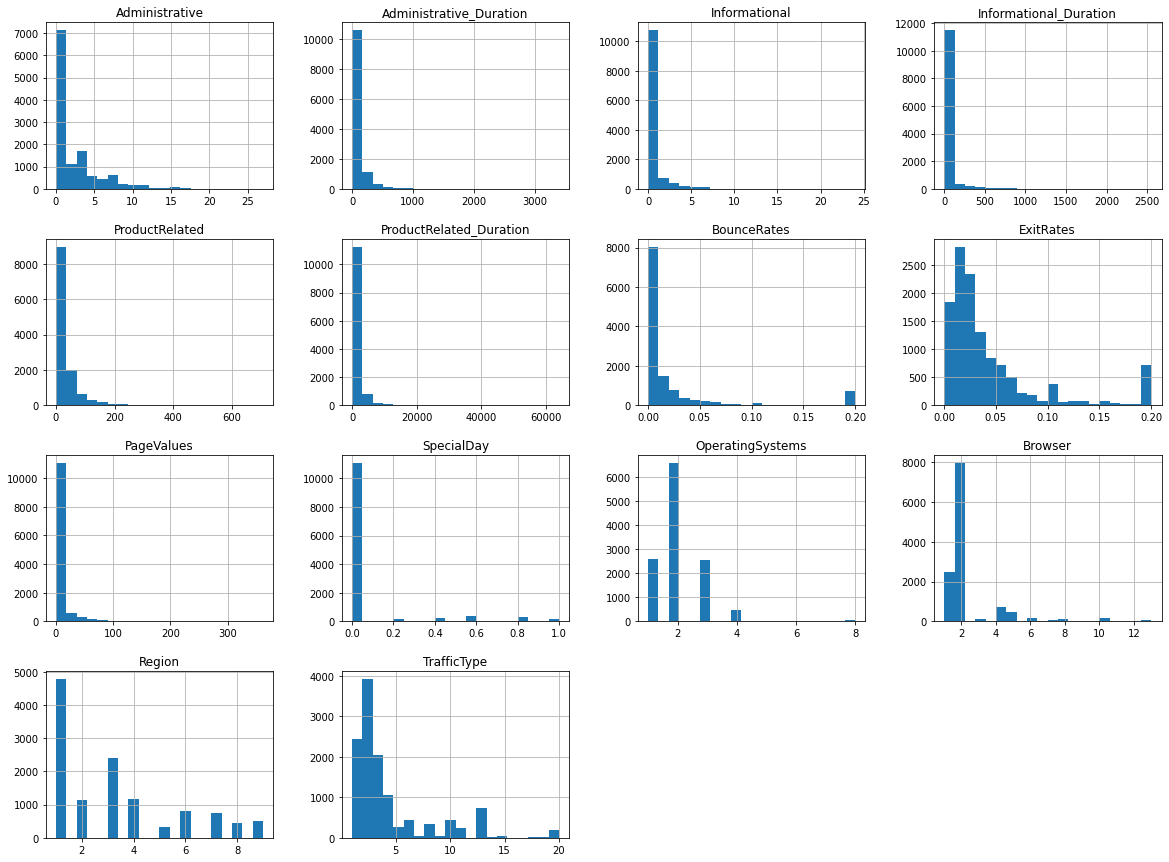

In [ ]:
#create histograms of each feature, excluding the two boolean features to get a feel for the distribution within the features. 

%matplotlib inline
import matplotlib.pyplot as plt
data.iloc[:, :16].hist(bins=20, figsize=(20,15))
plt.show()

In [ ]:
#explore the counts for the Weekend feature
data["Weekend"].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

In [ ]:
#explore the counts for the Revenue feature
data["Revenue"].value_counts()

#NOTE: this would indicate imbalaced data as the data amounting to a sale comprises only ~1/5 of the total data 

False    10422
True      1908
Name: Revenue, dtype: int64

In [ ]:
#explore the counts for the VisitorType feature, for some reason wouldn't be part of the plots
data["VisitorType"].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

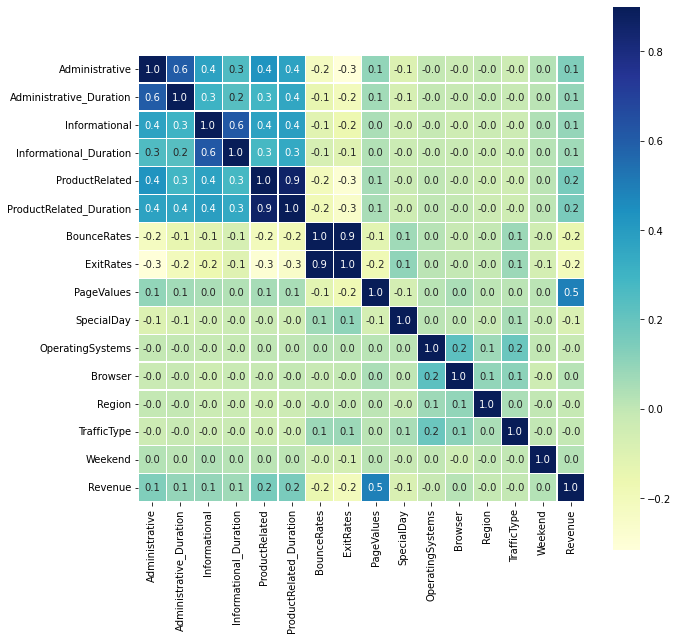

In [ ]:
#create a correlation heatmap to observe any correlations between features
corr_matrix = data.corr()

import seaborn as sns 
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, vmax=0.9, square=True, annot=True, linewidth=0.3, cmap="YlGnBu", fmt=".1f")

#NOTE: not many immedidate correlations between the features except for between number of pages visited and duration spent of pages of that kind
#NOTE: BounceRate and ExitRate highly correlated but expected as they measure similar actions
#NOTE: most interested in Revenue, its strongest correlation is with PageValue
#NOTE: could features with 0 corr to revenue be excluded?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b72cb49d0>,
      dtype=object)

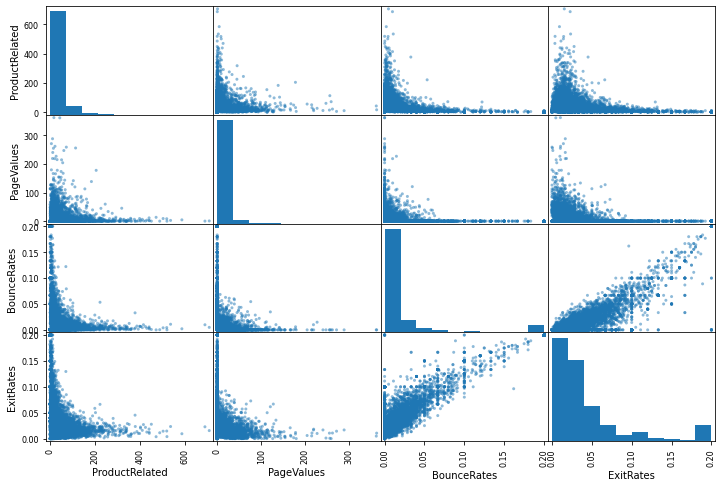

In [ ]:
#plot any interesting/strong correlations to visualise them 
from pandas.plotting import scatter_matrix

attributes1 = ["ProductRelated", "PageValues", "BounceRates", "ExitRates"]

scatter_matrix(data[attributes1], figsize=(12, 8))

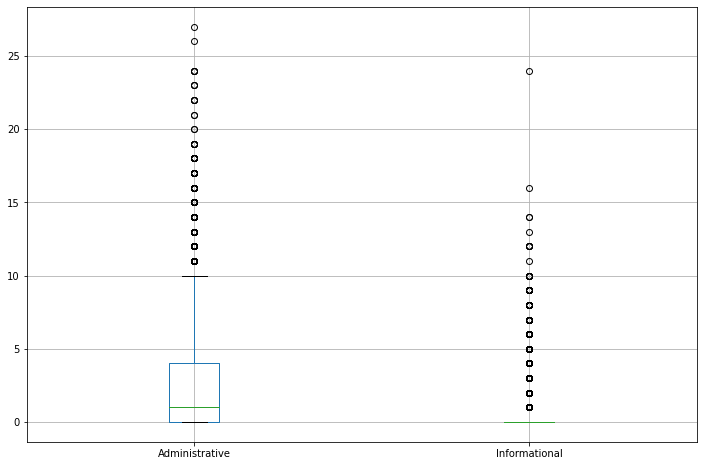

In [ ]:
#plotting boxplots to identify outliers, grouping by similar scales 

attributes2 = ["Administrative", "Informational"]
data[attributes2].boxplot(figsize=(12,8))
plt.show()

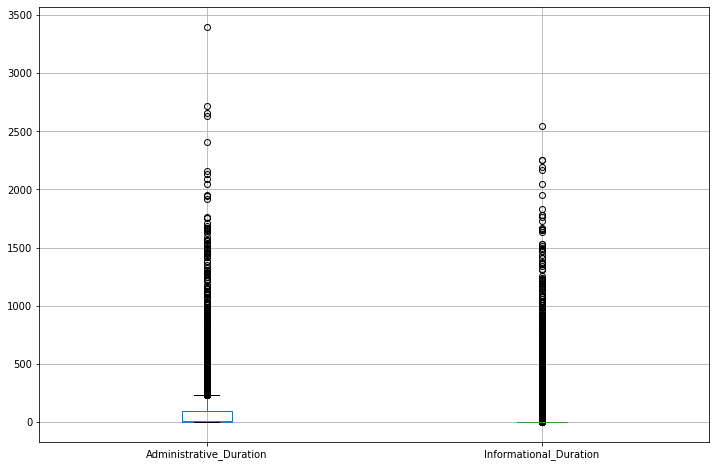

In [ ]:
#plotting boxplots to identify outliers, grouping by similar scales 

attributes3 = ["Administrative_Duration", "Informational_Duration"]
data[attributes3].boxplot(figsize=(12,8))
plt.show()

#NOTE: potential outlier in Administrative_Duration

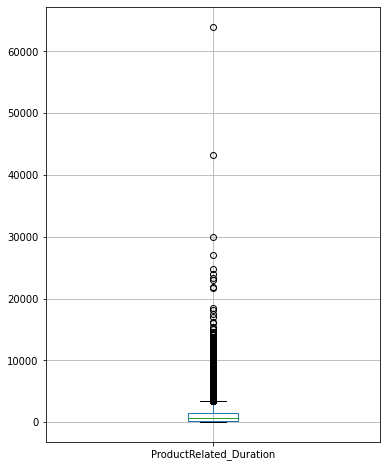

In [ ]:
#plotting boxplots to identify outliers, grouping by similar scales

data[["ProductRelated_Duration"]].boxplot(figsize=(6,8))

#NOTE: potential outlier

**Data pre-processing [30%]**

Carry out well thought pre-processing procedures to prepare the data into a form 
that is likely to lead to better performance.

In [ ]:
#convert booleans to numeric integer values 

data["Revenue"] = data["Revenue"]*1
data["Weekend"] = data["Weekend"]*1
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


In [ ]:
#stating our target and our variables

data_x = data.iloc[:, :-1]
data_y = data[['Revenue']]

data_x.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1


In [ ]:
#have this here while I write the pipeline to make sure I use the correct features and thier correct names
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000


In [ ]:
#pipeline 

import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer

# transformer for categorical features
categorical_features = ["Month", "VisitorType"]

categorical_transformer = Pipeline(
    [
        ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ]
)

# transformer for numerical features
numeric_features = ["Administrative_Duration", "Informational_Duration", "ProductRelated", "ProductRelated_Duration", "PageValues"]

numeric_transformer = Pipeline(
    [
        ('scaler', StandardScaler())
    ]
)

# combine them in a single ColumnTransformer
preprocessor = ColumnTransformer(
    [
        ('categoricals', categorical_transformer, categorical_features),
        ('numericals', numeric_transformer, numeric_features)
    ],
    remainder = 'drop'
)

#assign proccessed data to a new object 
data_x_processed = preprocessor.fit_transform(data_x)

#ensure it looks as we want it to
np.set_printoptions(threshold=np.inf, linewidth=np.inf, suppress=True, precision=2)
print(data_x_processed[0:20, :])

[[ 0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.   -0.46 -0.24 -0.69 -0.62 -0.32]
 [ 0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.   -0.46 -0.24 -0.67 -0.59 -0.32]
 [ 0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.   -0.46 -0.24 -0.69 -0.62 -0.32]
 [ 0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.   -0.46 -0.24 -0.67 -0.62 -0.32]
 [ 0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.   -0.46 -0.24 -0.49 -0.3  -0.32]
 [ 0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.   -0.46 -0.24 -0.29 -0.54 -0.32]
 [ 0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.   -0.46 -0.24 -0.69 -0.62 -0.32]
 [ 0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.   -0.46 -0.24 -0.71 -0.62 -0.32]
 [ 0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.   -0.46 -0.24 -0.67 -0.61 -0.32]
 

In [ ]:
#balancing the data 
#any random_state=42 to ensure the same datapoints are put in the same place everytime we restart the notebook

from collections import Counter
from imblearn import under_sampling

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 42)

X_resampled, y_resampled = rus.fit_resample(data_x_processed, data_y)

y_resampled.value_counts()
#count how many trues and falses there are in y_resampled, they should be equal

Revenue
1          1908
0          1908
dtype: int64

In [ ]:
#split data into training and test at a 70:30 ratio

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

#keep checking it looks right
X_train

array([[ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  , -0.46, -0.24, -0.35,  0.6 ,  0.64],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  , -0.46, -0.24, -0.65, -0.5 , -0.32],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  , -0.46, -0.24, -0.35, -0.37, -0.32],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  , -0.3 , -0.24,  1.85,  0.11, 13.45],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  , -0.46, -0.24, -0.47, -0.55, -0.32],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  , -0.3 , -0.12, -0.69, -0.62, -0.32],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  , -0.08,  0.22,  2.7 ,  1.3 ,  0.36],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  

**Model implementation [30%]** 

Select **three** representative classification methods with a clear justification of your 
choice. Implement and optimise the classifiers for your chosen classification 
methods.

In [ ]:
# Firstly, its good to know what a 'dumb' classifier scores to compare to our models

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.base import BaseEstimator 
from sklearn.model_selection import cross_val_score

class NeverTrueClassifier(BaseEstimator):
  def fit(self, X, y=None):
    return self 
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

never_true_clf = NeverTrueClassifier()

never_true_clf_pred = never_true_clf.predict(X_test)

print(classification_report(y_test, never_true_clf_pred ))
print(confusion_matrix(y_test, never_true_clf_pred))

#proving that even guessing FALSE everytime gets 52% accuracy bc 52% of the data IS FALSE 
#this is what we want to improve on!

              precision    recall  f1-score   support

           0       0.52      1.00      0.68       590
           1       0.00      0.00      0.00       555

    accuracy                           0.52      1145
   macro avg       0.26      0.50      0.34      1145
weighted avg       0.27      0.52      0.35      1145

[[590   0]
 [555   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###KNN

In [ ]:
#KNN Classifier

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=19, metric='manhattan')
knn_clf.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(metric='manhattan', n_neighbors=19)

In [ ]:
knn_pred = knn_clf.predict(X_test)

print(classification_report(y_test, knn_pred))
print(confusion_matrix(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       590
           1       0.82      0.81      0.82       555

    accuracy                           0.82      1145
   macro avg       0.82      0.82      0.82      1145
weighted avg       0.82      0.82      0.82      1145

[[488 102]
 [103 452]]


In [ ]:
#cross validation scores

scores = cross_val_score(knn_clf, X_test, y_test.values.ravel(), cv=5)
scores

array([0.79, 0.79, 0.81, 0.83, 0.8 ])

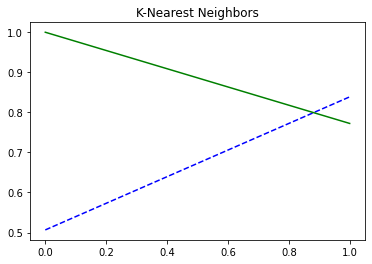

In [ ]:
#precision vs recall plot

from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import precision_recall_curve

y_scores_knn = cross_val_predict(knn_clf, X_train, y_train.values.ravel(), cv=3)

#this function is defined once here
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label='precision')
  plt.plot(thresholds, recalls[:-1], 'g-', label="recall")

precisions, recalls, thresholds = precision_recall_curve(y_train.values.ravel(), y_scores_knn)

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.title("K-Nearest Neighbors")
plt.show()


In [ ]:
#use gridsearch CV to tune the hyperparameters 
from sklearn.model_selection import GridSearchCV

clf_knn = GridSearchCV(knn_clf, {
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30],
    'metric': ['minkowski', 'euclidean', 'manhattan']
    },return_train_score=False)

clf_knn.fit(X_train, y_train.values.ravel())

#lets see the optimum settings found 
print("knn best estimator: ", clf_knn.best_estimator_)
print("knn best score: ", clf_knn.best_score_)
print("knn best parameters: ", clf_knn.best_params_)

knn best estimator:  KNeighborsClassifier(metric='manhattan', n_neighbors=19)
knn best score:  0.8165522069375897
knn best parameters:  {'metric': 'manhattan', 'n_neighbors': 19}


###Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [ ]:
y_pred = tree_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       590
           1       0.83      0.88      0.85       555

    accuracy                           0.85      1145
   macro avg       0.86      0.86      0.85      1145
weighted avg       0.86      0.85      0.85      1145

[[487 103]
 [ 64 491]]


In [ ]:
scores = cross_val_score(tree_clf, X_test, y_test.values.ravel(), cv=5)
scores

array([0.84, 0.85, 0.87, 0.87, 0.85])

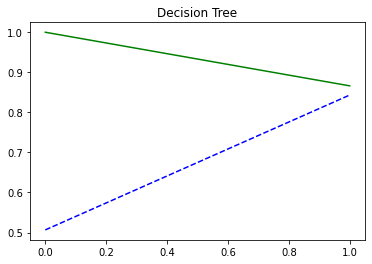

In [ ]:
y_scores_dt = cross_val_predict(tree_clf, X_train, y_train.values.ravel(), cv=3)

precisions, recalls, thresholds = precision_recall_curve(y_train.values.ravel(), y_scores_dt)

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.title("Decision Tree")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

clf_dt = GridSearchCV(tree_clf, {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1,2,3,4,5,6,7,None]
}, cv=10, n_jobs=-1, return_train_score=False)

clf_dt.fit(X_train, y_train.values.ravel())
clf_dt.cv_results_

df = pd.DataFrame(clf_dt.cv_results_)
#df[['param_C', 'param_kernel', 'mean_test_score']]
df

print("Decision Tree best estimator: ", clf_dt.best_estimator_)
print("Decision Tree best score: ", clf_dt.best_score_)
print("Decision Tree best parameters: ", clf_dt.best_params_)

Decision Tree best estimator:  DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
Decision Tree best score:  0.8536237352563028
Decision Tree best parameters:  {'criterion': 'entropy', 'max_depth': 3}


###Support Vector  Machine (SVM)

In [ ]:
from sklearn import svm

svm_classifier = svm.SVC(kernel = 'rbf', probability=True)

svm_classifier.fit(X_train, y_train.values.ravel())

SVC(probability=True)

In [ ]:
y_pred = svm_classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       590
           1       0.83      0.81      0.82       555

    accuracy                           0.83      1145
   macro avg       0.83      0.83      0.83      1145
weighted avg       0.83      0.83      0.83      1145

[[500  90]
 [103 452]]


In [ ]:
scores = cross_val_score(svm_classifier, X_test, y_test.values.ravel(), cv=5)
scores

array([0.83, 0.79, 0.83, 0.83, 0.82])

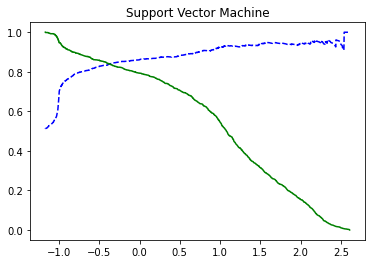

In [ ]:
y_scores_svm = cross_val_predict(svm_classifier, X_train, y_train.values.ravel(), cv=3, method='decision_function')

precisions, recalls, thresholds = precision_recall_curve(y_train.values.ravel(), y_scores_svm)

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.title("Support Vector Machine")
plt.show()

In [ ]:
#use gridsearch CV to tune the hyperparameters 
from sklearn.model_selection import GridSearchCV

clf_svm = GridSearchCV(svm_classifier, {
    'C': [1, 10, 20],
    'kernel': ["rbf", "linear"]
}, cv=5, return_train_score=False)

clf_svm.fit(X_train, y_train.values.ravel())
clf_svm.cv_results_

df = pd.DataFrame(clf_svm.cv_results_)

print("SVM best estimator: ", clf_svm.best_estimator_)
print("SVM best score: ", clf_svm.best_score_)
print("SVM best parameters: ", clf_svm.best_params_)


SVM best estimator:  SVC(C=1, probability=True)
SVM best score:  0.829655920753264
SVM best parameters:  {'C': 1, 'kernel': 'rbf'}


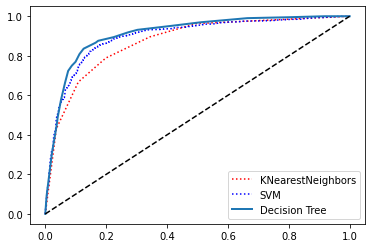

KNearestNeighbors AUC:  0.8714333460067942
Support Vector Machine AUC:  0.8969165357262622
Decision Tree AUC:  0.9116143858362297


In [ ]:
#ROC curve and scores for each model!

from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(fpr_dt, tpr_dt, label="Decision Tree"):
  plt.plot(fpr_dt, tpr_dt, linewidth=2, label="Decision Tree")
  plt.plot([0,1], [0,1], 'k--')

y_probs_svm = cross_val_predict(svm_classifier, X_train, y_train.values.ravel(), cv=3, method='predict_proba')
y_probs_knn = cross_val_predict(knn_clf, X_train, y_train.values.ravel(), cv=3, method='predict_proba')
y_probs_dt = cross_val_predict(tree_clf, X_train, y_train.values.ravel(), cv=3, method='predict_proba')

y_score_svm = y_probs_svm[:,1]
y_score_knn = y_probs_knn[:,1]
y_score_dt = y_probs_dt[:,1]

fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_train, y_score_svm)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_train, y_score_knn)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_train, y_score_dt)

plt.plot(fpr_knn, tpr_knn, "r:", label="KNearestNeighbors")
plt.plot(fpr_svm, tpr_svm, "b:", label="SVM")
plot_roc_curve(fpr_dt, tpr_dt, "Decision Tree")
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import roc_auc_score
print("KNearestNeighbors AUC: ", roc_auc_score(y_train, y_score_knn))
print("Support Vector Machine AUC: ", roc_auc_score(y_train, y_score_svm))
print("Decision Tree AUC: ", roc_auc_score(y_train, y_score_dt))

#####END
